In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 120

df = pd.DataFrame({
    "age": np.random.randint(18, 65, size=n),
    "gender": np.random.choice(["Male", "Female"], size=n),
    "monthly_income": np.random.normal(8000, 2500, size=n),
    "city": np.random.choice(["İstanbul", "Ankara", "İzmir"], size=n),
    "purchase_score": np.random.randint(1, 100, size=n),
})

# eksik değerler ekle
df.loc[np.random.choice(n, 10, replace=False), "monthly_income"] = np.nan
df.loc[np.random.choice(n, 8, replace=False), "city"] = np.nan

# anlamlı target: harcama miktarı
df["spending"] = df["monthly_income"] * 0.8 + df["age"] * 30 + np.random.normal(0, 700, size=n)

# aykırı değer
df.loc[3, "spending"] = 60000
df.loc[10, "monthly_income"] = 50000

df.head()

,age,gender,monthly_income,city,purchase_score,spending
0,56,Female,7839.054873,İstanbul,34,9102.721298
1,46,Female,8862.255838,İstanbul,7,8295.479442
2,32,Male,7799.781662,İstanbul,68,7603.415203
3,60,Male,NaN,İstanbul,58,60000.000000
4,25,Female,11583.788718,İzmir,75,12172.247540


## 📘 **Ödev: Veri Önişleme Görevi (10 Adım)**

### 🧹 1. **Eksik Değer Analizi**

* Hangi sütunlarda eksik veri var?
* Her bir sütun için eksik oranı nedir?

### 🧼 2. **Eksik Verilerin Tamamlanması**

* Sayısal değişkenleri `SimpleImputer` ile doldur
* Kategorik değişkenleri en sık kategori ile doldur

### 📊 3. **Aykırı Değer Analizi**

* `spending` ve `monthly_income` değişkenleri için boxplot çiz
* IQR yöntemine göre aykırı değerleri tespit et

### ✂️ 4. **Aykırı Değer İşleme**

* Winsorizing veya clip yöntemiyle aykırıları baskıla

### 🔣 5. **Kategorik Verileri Kodla**

* `gender`: LabelEncoder
* `city`: One-Hot Encoding

### ⚖️ 6. **Sayısal Değişkenleri Ölçekle**

* `StandardScaler` veya `RobustScaler` kullan
* Sadece sayısal sütunları ölçekle

### 📈 7. **Log Dönüşüm Uygula**

* `spending` değişkenine `np.log1p()` uygula
* Dağılımını görselleştir

### 🤖 8. **Model Kur**

* Bağımlı değişken: `spending_log`
* Lineer regresyon modeli kur ve değerlendir (`R²`, `MSE`)

### 📉 9. **Modeli Değerlendir**

* R² değeri ne çıktı? Yorumla.
* Modelin eksik yönlerini düşün

### 💬 10. **Ekstra Bonus: random forest**

* r2 skorun eksik çıktı. üzülme.
* Rondom Forest ile dene

### 🧹 1. **Eksik Değer Analizi**

* Hangi sütunlarda eksik veri var?
* Her bir sütun için eksik oranı nedir?


In [ ]:
# 🧹 1. **Eksik Değer Analizi**


# Eksik değerlerin genel görünümü
print("Missing values per column:")
print(df.isnull().sum())

# Her sütun için eksik veri oranı (satır sayısına göre)
missing_ratio = df.isnull().sum() / len(df)

# Yalnızca eksik verisi olan sütunları göster
missing_ratio = missing_ratio[missing_ratio > 0]

# Sonuçları yazdır
print("\nColumns with missing values ratio:")
print(missing_ratio.sort_values(ascending=False))

Missing values per column:
age                0
gender             0
monthly_income    10
city               8
purchase_score     0
spending           9
dtype: int64

Columns with missing values ratio:
monthly_income    0.083333
spending          0.075000
city              0.066667
dtype: float64


### 🧼 2. **Eksik Verilerin Tamamlanması**

* Sayısal değişkenleri `SimpleImputer` ile doldur
* Kategorik değişkenleri en sık kategori ile doldur

In [ ]:
# 🧼 2. **Eksik Verilerin Tamamlanması**

from sklearn.impute import SimpleImputer

# Sayısal değişkenli ve kategorik değşkenli sütunları tespit etme
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Sayısal değişkenli sütunun eksik verilerini ortalama ile doldurma
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Kategorik değişkenli sütunun eksik verilerini en çok tekrarlanan değer ile doldurma
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Eksik veri kalmadığından emin olma
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
age               0
gender            0
monthly_income    0
city              0
purchase_score    0
spending          0
dtype: int64


### 📊 3. **Aykırı Değer Analizi**

* `spending` ve `monthly_income` değişkenleri için boxplot çiz
* IQR yöntemine göre aykırı değerleri tespit et


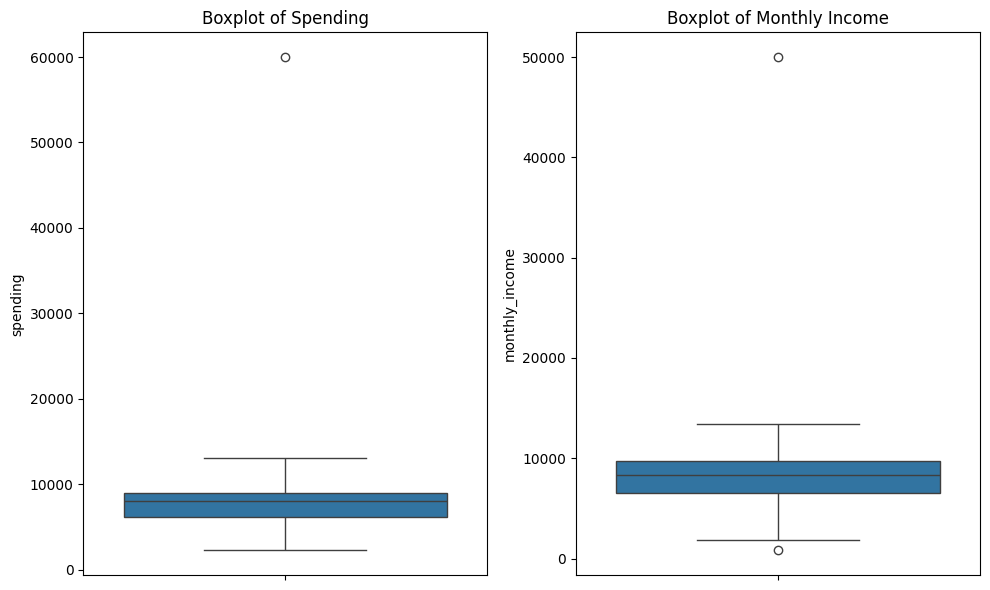


Outliers detected in 'spending' using IQR:
    age gender  monthly_income      city  purchase_score  spending
3  60.0   Male     8373.833079  İstanbul            58.0   60000.0

Outliers detected in 'monthly_income' using IQR:


,age,gender,monthly_income,city,purchase_score,spending
10,28.0,Male,50000.000000,İzmir,10.0,6281.905512
56,52.0,Female,801.357766,Ankara,25.0,2648.100934


In [ ]:
# 📊 3. **Aykırı Değer Analizi**

import matplotlib.pyplot as plt
import seaborn as sns

# spending ve monthly_income için Boxplot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['spending'])
plt.title('Boxplot of Spending')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['monthly_income'])
plt.title('Boxplot of Monthly Income')

plt.tight_layout()
plt.show()

# IQR method kullanarak aykırı değerleri tespit etme
def detect_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers

outliers_spending = detect_outliers_iqr(df, 'spending')
outliers_monthly_income = detect_outliers_iqr(df, 'monthly_income')

print("\nOutliers detected in 'spending' using IQR:")
print(outliers_spending)

print("\nOutliers detected in 'monthly_income' using IQR:")
outliers_monthly_income


### ✂️ 4. **Aykırı Değer İşleme**

* Winsorizing veya clip yöntemiyle aykırıları baskıla

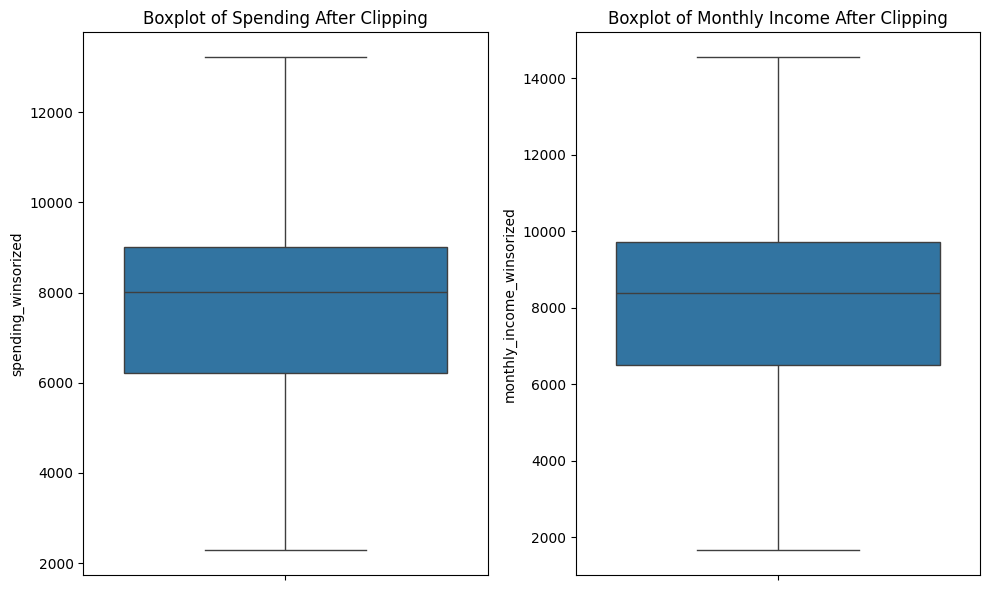


Outliers after clipping:
    age gender  monthly_income      city  purchase_score  spending  \
3  60.0   Male     8373.833079  İstanbul            58.0   60000.0   

   spending_winsorized  monthly_income_winsorized  
3         13227.392455                8373.833079  
     age  gender  monthly_income    city  purchase_score     spending  \
10  28.0    Male    50000.000000   İzmir            10.0  6281.905512   
56  52.0  Female      801.357766  Ankara            25.0  2648.100934   

    spending_winsorized  monthly_income_winsorized  
10          6281.905512               14555.536390  
56          2648.100934                1656.916811  


In [ ]:
# ✂️ 4. **Aykırı Değer İşleme**


# Calculate bounds for 'spending'
Q1_spending = df['spending'].quantile(0.25)
Q3_spending = df['spending'].quantile(0.75)
IQR_spending = Q3_spending - Q1_spending
lower_bound_spending = Q1_spending - 1.5 * IQR_spending
upper_bound_spending = Q3_spending + 1.5 * IQR_spending

# Calculate bounds for 'monthly_income'
Q1_income = df['monthly_income'].quantile(0.25)
Q3_income = df['monthly_income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income


# Apply clipping using the calculated bounds
df["spending_winsorized"] = df["spending"].clip(lower=lower_bound_spending, upper=upper_bound_spending)
df["monthly_income_winsorized"] = df["monthly_income"].clip(lower=lower_bound_income, upper=upper_bound_income)


# Visualize

# Verify outliers are handled by plotting again
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['spending_winsorized'])
plt.title('Boxplot of Spending After Clipping')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['monthly_income_winsorized'])
plt.title('Boxplot of Monthly Income After Clipping')

plt.tight_layout()
plt.show()

print("\nOutliers after clipping:")
print(detect_outliers_iqr(df, 'spending'))
print(detect_outliers_iqr(df, 'monthly_income'))

### 🔣 5. **Kategorik Verileri Kodla**

* `gender`: LabelEncoder
* `city`: One-Hot Encoding


In [ ]:
# 🔣 5. **Kategorik Verileri Kodla**


from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encode 'gender'
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

# One-Hot Encode 'city'
df = pd.get_dummies(df, columns=['city'], drop_first=True)

print("\nDataFrame after encoding categorical variables:")
df.head()


DataFrame after encoding categorical variables:


,age,gender,monthly_income,purchase_score,spending,spending_winsorized,monthly_income_winsorized,city_İstanbul,city_İzmir
0,56.0,0,7839.054873,34.0,9102.721298,9102.721298,7839.054873,True,False
1,46.0,0,8862.255838,7.0,8295.479442,8295.479442,8862.255838,True,False
2,32.0,1,7799.781662,68.0,7603.415203,7603.415203,7799.781662,True,False
3,60.0,1,8373.833079,58.0,60000.000000,13227.392455,8373.833079,True,False
4,25.0,0,11583.788718,75.0,12172.247540,12172.247540,11583.788718,False,True


### ⚖️ 6. **Sayısal Değişkenleri Ölçekle**

* `StandardScaler` veya `RobustScaler` kullan
* Sadece sayısal sütunları ölçekle


In [ ]:
# ⚖️ 6. **Sayısal Değişkenleri Ölçekle**

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Sayısal sütunlar
df_numeric = df[['age', 'monthly_income', 'purchase_score', 'spending']].dropna()

# Eğitim/test ayrımı
X_train, X_test = train_test_split(df_numeric, test_size=0.2, random_state=42)

# RobustScaler
scaler_std = RobustScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


print("\nDataFrame after scaling numerical variables:")
df.head()




DataFrame after scaling numerical variables:


,age,gender,monthly_income,purchase_score,spending,spending_winsorized,monthly_income_winsorized,city_İstanbul,city_İzmir,spending_log
0,0.60,0,-0.165840,-0.264706,0.387083,9102.721298,7839.054873,True,False,0.327203
1,0.20,0,0.151465,-0.794118,0.099256,8295.479442,8862.255838,True,False,0.094634
2,-0.36,1,-0.178019,0.401961,-0.147503,7603.415203,7799.781662,True,False,-0.159586
3,0.76,1,0.000000,0.205882,18.534811,13227.392455,8373.833079,True,False,2.972198
4,-0.64,0,0.995442,0.539216,1.481541,12172.247540,11583.788718,False,True,0.908880


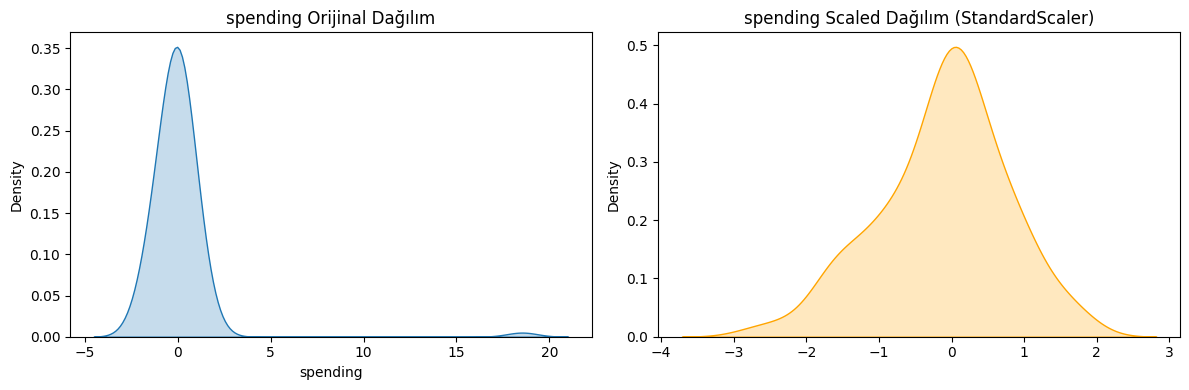

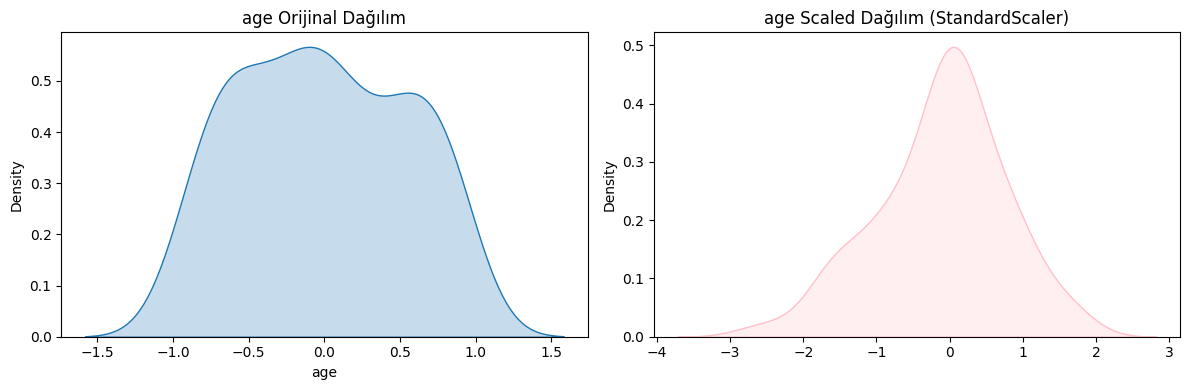

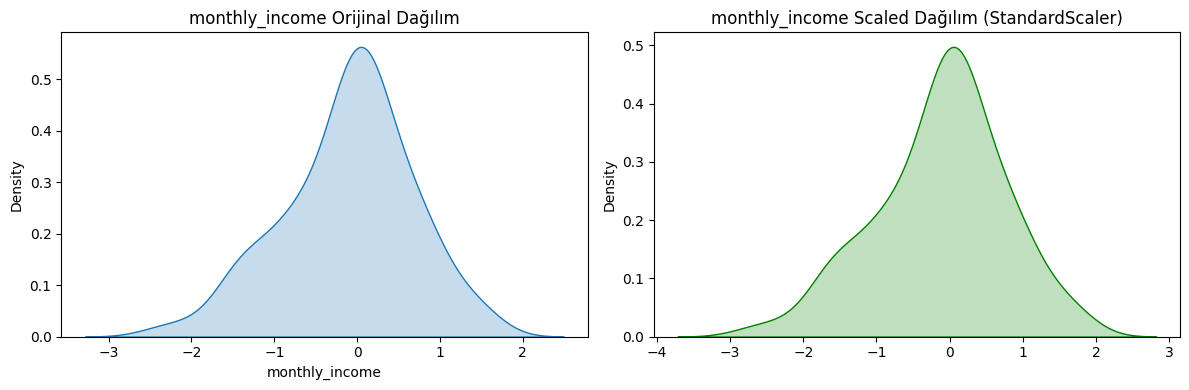

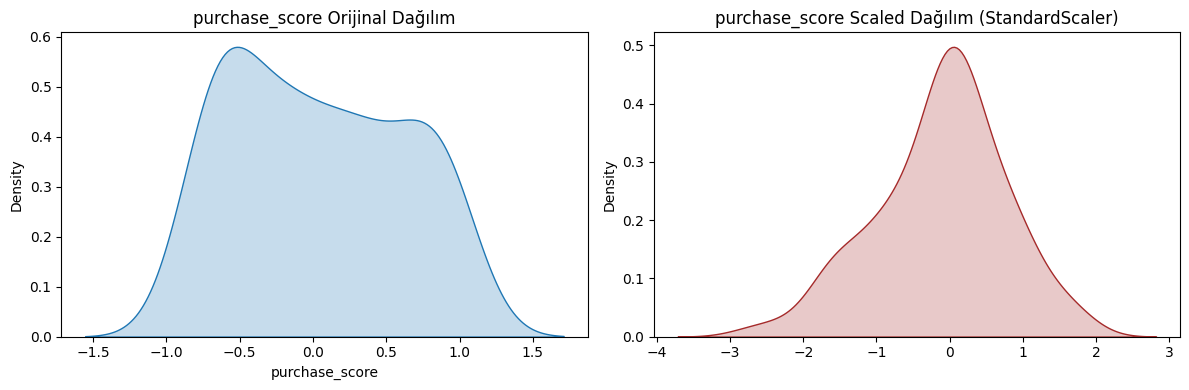

In [ ]:
## Görselleştirme: Öncesi ve Sonrası Karşılaştırması**

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(X_train['spending'], label='Orijinal', fill=True)
plt.title("spending Orijinal Dağılım")

plt.subplot(1, 2, 2)
sns.kdeplot(X_train_std[:, 1], label='StandardScaler', fill=True, color="orange")
plt.title("spending Scaled Dağılım (StandardScaler)")

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(X_train['age'], label='Orijinal', fill=True)
plt.title("age Orijinal Dağılım")

plt.subplot(1, 2, 2)
sns.kdeplot(X_train_std[:, 1], label='StandardScaler', fill=True, color="pink")
plt.title("age Scaled Dağılım (StandardScaler)")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(X_train['monthly_income'], label='Orijinal', fill=True)
plt.title("monthly_income Orijinal Dağılım")

plt.subplot(1, 2, 2)
sns.kdeplot(X_train_std[:, 1], label='StandardScaler', fill=True, color="green")
plt.title("monthly_income Scaled Dağılım (StandardScaler)")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(X_train['purchase_score'], label='Orijinal', fill=True)
plt.title("purchase_score Orijinal Dağılım")

plt.subplot(1, 2, 2)
sns.kdeplot(X_train_std[:, 1], label='StandardScaler', fill=True, color="brown")
plt.title("purchase_score Scaled Dağılım (StandardScaler)")

plt.tight_layout()
plt.show()


### 📈 7. **Log Dönüşüm Uygula**

* `spending` değişkenine `np.log1p()` uygula
* Dağılımını görselleştir

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


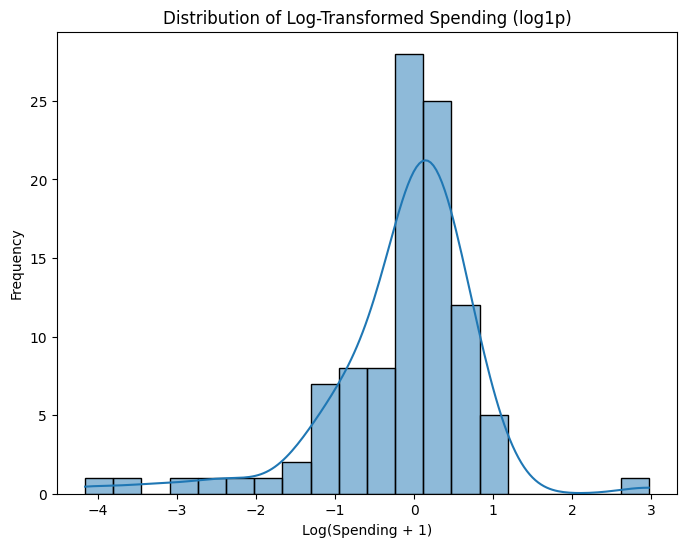

In [ ]:
# 📈 7. **Log Dönüşüm Uygula**


# np.log1p() 'spending' üzerine uygulaması
df['spending_log'] = np.log1p(df['spending'])

# 'spending_log' dağılımını gösterimi
plt.figure(figsize=(8, 6))
sns.histplot(df['spending_log'], kde=True)
plt.title('Distribution of Log-Transformed Spending (log1p)')
plt.xlabel('Log(Spending + 1)')
plt.ylabel('Frequency')
plt.show()

### 🤖 8. **Model Kur**

* Bağımlı değişken: `spending_log`
* Lineer regresyon modeli kur ve değerlendir (`R²`, `MSE`)

In [ ]:
df['spending_log'] = df['spending_log'].fillna(df['spending_log'].median())

In [ ]:
# 🤖 8. **Model Kur**


# (X) ve (y) değişkenini tanımlandı.
# Orijinden 'spending' sütununu ve 'spending_log' çıkarılır.
x = df.drop(columns=['spending', 'spending_log'], axis=1)
y = df['spending_log']

# Datayı test ve eğitim için ikiye bölünür.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Sadece sayısal değişkenleri ölçekle
num_cols = ["age", "monthly_income", "purchase_score"]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])     # fit + transform
X_test[num_cols] = scaler.transform(X_test[num_cols])           # sadece transform





In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error # Import r2_score and mean_squared_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans metrikleri
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Sonuçları yazdır
print(f"Model R²: {r2:.3f}")
print(f"Model MSE: {mse:.4f}")

Model R²: 0.809
Model MSE: 0.2495


### 📉 9. **Modeli Değerlendir**

* R² değeri ne çıktı? Yorumla.
* Modelin eksik yönlerini düşün

In [ ]:
# 📉 9. **Modeli Değerlendir**


print(f"\nR² değeri: {r2:.3f}")
print("Yorum: R² değeri, modelin bağımlı değişkendeki (spending_log) değişimin ne kadarını açıkladığını gösterir.")
print(f"Eğer R² değeri {r2:.3f} çıktıysa:")
if r2 >= 0.7:
    print("- Bu değer, modelin veri setine oldukça iyi uyduğunu ve bağımlı değişkendeki varyasyonun önemli bir kısmını açıkladığını gösterir.")
elif r2 >= 0.4:
    print("- Bu değer, modelin bağımlı değişkendeki varyasyonun bir miktarını açıkladığını gösterir. Daha iyi bir performans için model veya özellik iyileştirmeleri gerekebilir.")
else:
    print("- Bu değer, modelin bağımlı değişkendeki varyasyonu çok az açıkladığını gösterir. Modelin performansı düşük olabilir ve farklı özellikler veya model türleri denemek gerekebilir.")




R² değeri: 0.809
Yorum: R² değeri, modelin bağımlı değişkendeki (spending_log) değişimin ne kadarını açıkladığını gösterir.
Eğer R² değeri 0.809 çıktıysa:
- Bu değer, modelin veri setine oldukça iyi uyduğunu ve bağımlı değişkendeki varyasyonun önemli bir kısmını açıkladığını gösterir.


###Modelin olası eksik yönleri:
###1.Overfitting (Aşırı Öğrenme):
Model, eğitim verilerine çok iyi uyum sağlayıp ezberlemiş olabilir, ancak yeni verilerde aynı başarıyı gösteremeyebilir.

###2.Nedensellik Değil, Korelasyon:
Yüksek R², değişkenler arasında güçlü bir ilişki olduğunu gösterir, ancak bu ilişkinin bir neden-sonuç ilişkisi olduğu anlamına gelmez.

###3.Eksik Değişken Yanlılığı (Omitted Variable Bias):

Modelde, sonucu etkileyebilecek önemli bazı değişkenler hesaba katılmamış olabilir, bu da tahminleri yanıltabilir.

###4.Modelin Varsayımları (Özellikle Doğrusal Regresyon için):
Özellikle doğrusal regresyon gibi modellerin temel aldığı varsayımlar (hataların dağılımı, bağımsızlığı vb.) karşılanmıyorsa, R² yanıltıcı olabilir.



### 💬 10. **Ekstra Bonus: random forest**

* r2 skorun eksik çıktı. üzülme.
* Rondom Forest ile dene

In [ ]:
# 💬 10. **Ekstra Bonus: random forest**
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

#  Model performansını değerlendir
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Sonuçları yazdır
print(f"✅ Model R²: {r2:.3f}")
print(f"✅ Model MSE: {mse:.4f}")

print(f"\nR² değeri: {r2:.3f}")
print("Yorum: R² değeri, modelin bağımlı değişkendeki (spending_log) değişimin ne kadarını açıkladığını gösterir.")
print(f"Eğer R² değeri {r2:.3f} çıktıysa:")
if r2 >= 0.7:
    print("- Bu değer, modelin veri setine oldukça iyi uyduğunu ve bağımlı değişkendeki varyasyonun önemli bir kısmını açıkladığını gösterir.")
elif r2 >= 0.4:
    print("- Bu değer, modelin bağımlı değişkendeki varyasyonun bir miktarını açıkladığını gösterir. Daha iyi bir performans için model veya özellik iyileştirmeleri gerekebilir.")
else:
    print("- Bu değer, modelin bağımlı değişkendeki varyasyonu çok az açıkladığını gösterir. Modelin performansı düşük olabilir ve farklı özellikler veya model türleri denemek gerekebilir.")



✅ Model R²: 0.809
✅ Model MSE: 0.2495

R² değeri: 0.809
Yorum: R² değeri, modelin bağımlı değişkendeki (spending_log) değişimin ne kadarını açıkladığını gösterir.
Eğer R² değeri 0.809 çıktıysa:
- Bu değer, modelin veri setine oldukça iyi uyduğunu ve bağımlı değişkendeki varyasyonun önemli bir kısmını açıkladığını gösterir.


R^2 değerleri aynı çıktı. Bir farklılık gözlemlenmedi.
